# ANALYSING AND PREDICTING HOUSING DATA SET

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pip install seaborn # installing the seaborn library 

Note: you may need to restart the kernel to use updated packages.


In [3]:
housing = pd.read_csv("Housing.csv") # importing the data

In [4]:
housing.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
housing.shape # 545 rows and 13 columns

(545, 13)

In [6]:
housing.isnull().sum() #checking for missing values in the dataset

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
housing.info() #data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


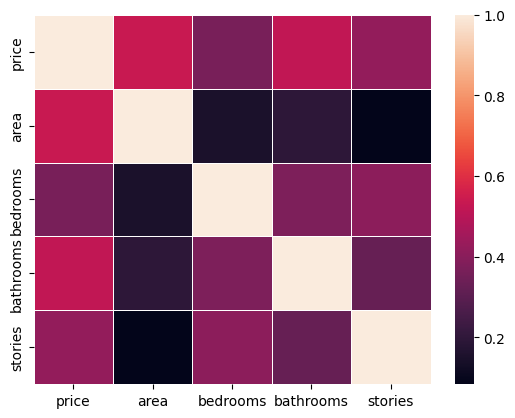

In [9]:
housing2 = housing[housing.columns[:5]]

# a correlation heat map between the forst 
#plt.figure(figsize= (36,20))
sns.heatmap(housing2.corr(),cbar = True,linewidth =0.5)
plt.show()


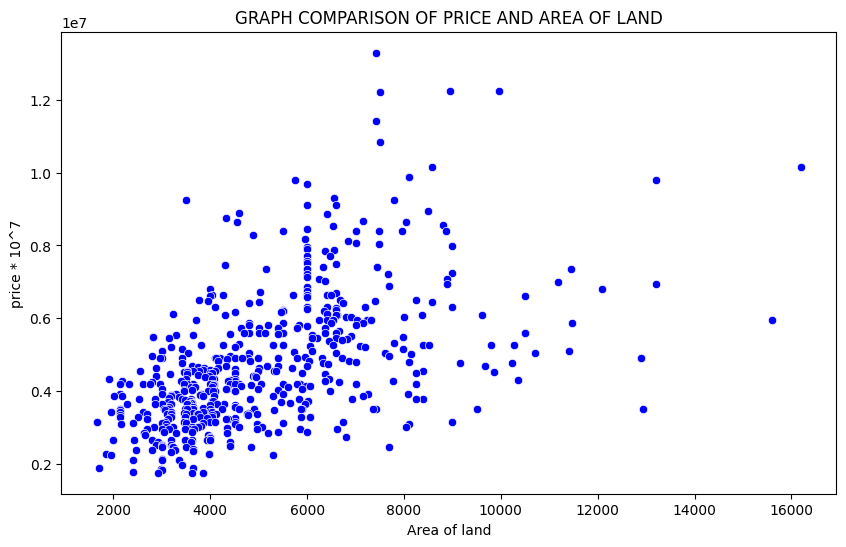

In [10]:
# ploting the price against area of land
plt.figure(figsize=(10,6))
sns.scatterplot(x= "area",y="price",data = housing,color = "b")
plt.title("GRAPH COMPARISON OF PRICE AND AREA OF LAND")
plt.ylabel("price * 10^7")
plt.xlabel("Area of land")

plt.show()
#theirs a linear relationship between the two variables as seen

<Figure size 3600x2000 with 0 Axes>

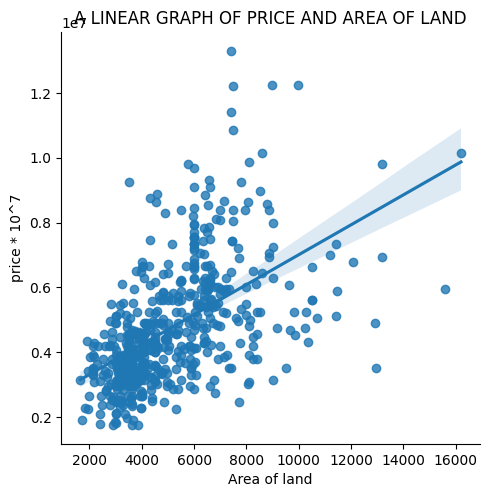

In [11]:
# ploting the price against area of linear model
plt.figure(figsize=(36,20))
sns.lmplot(x= "area",y="price",data = housing)
plt.title("A LINEAR GRAPH OF PRICE AND AREA OF LAND")
plt.ylabel("price * 10^7")
plt.xlabel("Area of land")

plt.show()


## MODELS EVALUATION TO DETERMINE THEIR ACCURACY OF PREDICTION

## Determining whether house has a main road outside based on its price,area of land,number of bedrooms,bathrooms and stories

### Support Vector Machine algorithm (SVM)

In [13]:
X = housing[housing.columns[:5]]
y = housing["mainroad"].map({"yes":1,"no":0})
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#predict whether the house has a mainroad
def h_mainroad():
    global X_train,X_test,y_train,y_test #declaring the variables global
    
    model = SVC(gamma = 0.001)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    return acc*100

    


In [31]:
acct1 = h_mainroad()
print(acct1)

83.21167883211679


### KMeans clustering algorithm 

In [25]:
model1 = KMeans(n_clusters = 2,random_state= 0)
model1.fit(X_train,y_train)
pred = model1.predict(X_test)
print("accuracy: "+str(accuracy_score(y_test,pred)*100)+"%")
    
acct2 = accuracy_score(y_test,pred)*100

accuracy: 57.66423357664233%


### Decision Tree Classifier algorithm 

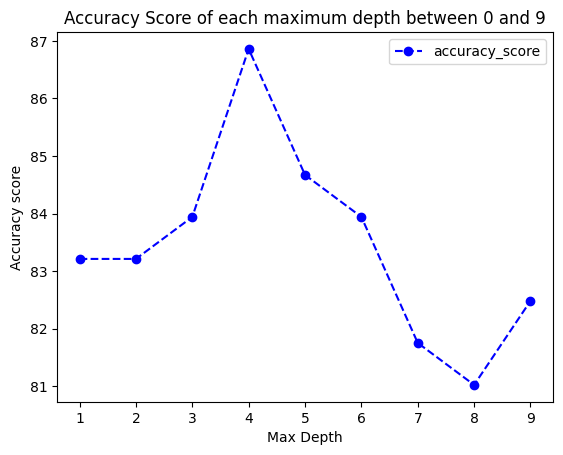

In [17]:
# Testing the accuracy using Decision tree algorithm

acc = []
for i in range(1,10):
    model3 = DecisionTreeClassifier(max_depth=i,random_state=0)
    model3.fit(X_train,y_train)
    pred = model3.predict(X_test)
    acc.append(accuracy_score(y_test,pred)*100)
    
# plotting the accuracy score for each max heap

#plt.figure(figsize=(30,15))
plt.plot([i for i in range(1,10)],acc,"bo--",label = "accuracy_score")
plt.title("Accuracy Score of each maximum depth between 0 and 9")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

# a max depth of 4 provides the best accuracy


In [26]:
model3 = DecisionTreeClassifier(max_depth=4,random_state=0)
model3.fit(X_train,y_train)
pred = model3.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,pred)*100}%")

acct3 = accuracy_score(y_test,pred)*100

Accuracy: 86.86131386861314%


### KNN (k nearest neighbor) algorithm 

In [19]:
model4 = neighbors.KNeighborsClassifier(n_neighbors=41,weights= "uniform")



In [27]:
model4.fit(X_train,y_train)
pred = model4.predict(X_test)
print(f"accuracy:{accuracy_score(y_test,pred)*100}%")

acct4 = accuracy_score(y_test,pred)*100

accuracy:83.21167883211679%


### Logistic Regression algorithm 

In [28]:
model5 = LogisticRegression()
model5.fit(X_train,y_train)
pred = model5.predict(X_test)
print(f"accuracy: {accuracy_score(y_test,pred)*100}%")

acct5= accuracy_score(y_test,pred)*100

accuracy: 82.48175182481752%


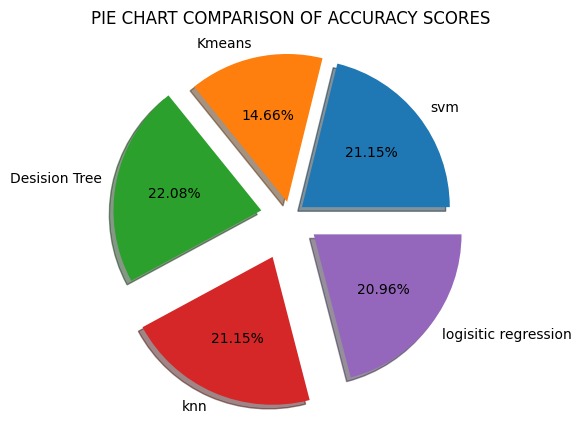

In [46]:
# pie chart 


acc_all = [acct1,acct2,acct3,acct4,acct5]

labels = ["svm","Kmeans","Desision Tree","knn","logisitic regression"]

plt.pie(acc_all,explode =(0.1,0.1,0.2,0.3,0.2),labels = labels,autopct='%1.2f%%',shadow = True)
plt.title("PIE CHART COMPARISON OF ACCURACY SCORES")
plt.show()


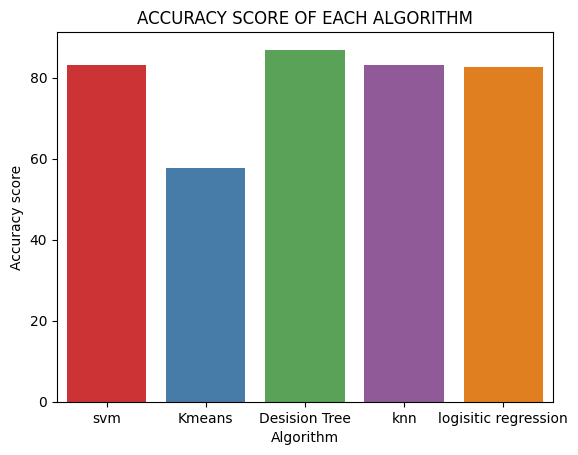

In [45]:
sns.barplot(x=labels,y=acc_all,palette = "Set1")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("ACCURACY SCORE OF EACH ALGORITHM")
plt.show()

#### The best model for prediction is the decision tree classifier which has the highest accuracy

In [47]:
# a function to predict whether house has mainroad or not based on user input

def mainroad(p,a,b1,b2,s):
    model = DecisionTreeClassifier(max_depth=4,random_state=0)
    #p = int(input("Enter price: "))
    #a = int(input("Enter area of land: "))
    #b1 = int(input("Enter number of bedrooms: "))
    #b2 = int(input("Enter number of bathrooms: "))
    #s = int(input("Enter number of stories: "))
    
    house = [[p,a,b1,b2,s]]
    sc = StandardScaler()
    house = sc.fit_transform(house)
    model.fit(X_train,y_train)
    
    if model.predict(house) == 1:
        return "House has mainroad outside"
    else:
        return "House has no mainroad outside"
                   

In [48]:
mainroad(1200000,26489,2,1,3)

'House has mainroad outside'

In [ ]:
q